<a href="https://colab.research.google.com/github/BraianBGit/DeepLearning2021/blob/main/CycleGan_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow-addons

     |████████████████████████████████| 1.1 MB 5.4 MB/s 


**Dependencies**

In [ ]:
import os, random, json, PIL, shutil, re, imageio, glob
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import ImageDraw
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as L
import tensorflow.keras.backend as K
import tensorflow_addons as tfa
from tensorflow.keras import Model, losses, optimizers
from tensorflow.keras.callbacks import Callback


def seed_everything(seed=0):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    
SEED = 0
seed_everything(SEED)

**TPU configuration**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

import matplotlib.pyplot as plt
import numpy as np

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Device:', tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()
print('Number of replicas:', strategy.num_replicas_in_sync)

    
print(tf.__version__)
REPLICAS = strategy.num_replicas_in_sync
AUTO = tf.data.experimental.AUTOTUNE
print(f'REPLICAS: {REPLICAS}')

Device: grpc://10.41.195.210:8470
INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Initializing the TPU system: grpc://10.41.195.210:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.41.195.210:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Number of replicas: 8
2.6.0
REPLICAS: 8


**Model parameters**

In [ ]:
HEIGHT = 256
WIDTH = 256
HEIGHT_RESIZE = 128
WIDTH_RESIZE = 128
CHANNELS = 3
BATCH_SIZE = 58
EPOCHS = 200
TRANSFORMER_BLOCKS = 6
GENERATOR_LR = 2e-4
DISCRIMINATOR_LR = 2e-4

**Load data**


In [ ]:
PHOTO_FILENAMES = tf.io.gfile.glob(str('/content/drive/MyDrive/DeepLearningTPs/dataset/training_real_resized/*.jpg'))
VINTAGE_FILENAMES = tf.io.gfile.glob(str('/content/drive/MyDrive/DeepLearningTPs/dataset/vintage_portrait_resized/*.jpg'))

n_photo_samples = len(PHOTO_FILENAMES)
n_vintage_samples = len(VINTAGE_FILENAMES)

print(f'Photo image files: {n_photo_samples}')
print(f'Vintage image files: {n_vintage_samples}')

Photo image files: 1081
Vintage image files: 1459


**Auxiliar functions**

In [ ]:
def normalize_img(img):
    img = tf.cast(img, dtype=tf.float32)
    # Map values in the range [-1, 1]
    return (img / 127.5) - 1.0

def decode_image(image):
    image = tf.image.decode_jpeg(image, channels=CHANNELS)
    image = tf.reshape(image, [HEIGHT, WIDTH, CHANNELS])
    return image

def read_tfrecord(example):
    tfrecord_format = {
        'image':      tf.io.FixedLenFeature([], tf.string)
    }
    example = tf.io.parse_single_example(example, tfrecord_format)
    image = decode_image(example['image'])
    return image

def load_dataset(filenames):
    tensors = []
  
    for filename in filenames:
      with open(filename, 'rb') as local_file:
        image = local_file.read()
      tensor = decode_image(image) 
      tensors.append(tensor)
    dataset = tf.data.Dataset.from_tensor_slices(tensors)
    # dataset = dataset.map(decode_image, num_parallel_calls=AUTO)
    return dataset

def get_dataset(filenames, augment=None, repeat=True, shuffle=True, batch_size=1):
    dataset = load_dataset(filenames)

    if augment:
        dataset = dataset.map(augment, num_parallel_calls=AUTO)
    dataset = dataset.map(normalize_img, num_parallel_calls=AUTO)
    if repeat:
        dataset = dataset.repeat()
    if shuffle:
        dataset = dataset.shuffle(512)
        
    dataset = dataset.batch(batch_size)
    dataset = dataset.cache()
    dataset = dataset.prefetch(AUTO)
    
    return dataset

def display_samples(ds, n_samples):
    ds_iter = iter(ds)
    for n_sample in range(n_samples):
        example_sample = next(ds_iter)
        plt.subplot(121)
        plt.imshow(example_sample[0] * 0.5 + 0.5)
        plt.axis('off')
        plt.show()
        
def display_generated_samples(ds, model, n_samples):
    ds_iter = iter(ds)
    for n_sample in range(n_samples):
        example_sample = next(ds_iter)
        generated_sample = model.predict(example_sample)
        
        f = plt.figure(figsize=(12, 12))
        
        plt.subplot(121)
        plt.title('Input image')
        plt.imshow(example_sample[0] * 0.5 + 0.5)
        plt.axis('off')
        
        plt.subplot(122)
        plt.title('Generated image')
        plt.imshow(generated_sample[0] * 0.5 + 0.5)
        plt.axis('off')
        plt.show()
        
def evaluate_cycle(ds, generator_a, generator_b, n_samples=1):
    fig, axes = plt.subplots(n_samples, 3, figsize=(22, (n_samples*6)))
    axes = axes.flatten()
    
    ds_iter = iter(ds)
    for n_sample in range(n_samples):
        idx = n_sample*3
        example_sample = next(ds_iter)
        generated_a_sample = generator_a.predict(example_sample)
        generated_b_sample = generator_b.predict(generated_a_sample)
        
        axes[idx].set_title('Input image', fontsize=18)
        axes[idx].imshow(example_sample[0] * 0.5 + 0.5)
        axes[idx].axis('off')
        
        axes[idx+1].set_title('Generated image', fontsize=18)
        axes[idx+1].imshow(generated_a_sample[0] * 0.5 + 0.5)
        axes[idx+1].axis('off')
        
        axes[idx+2].set_title('Cycled image', fontsize=18)
        axes[idx+2].imshow(generated_b_sample[0] * 0.5 + 0.5)
        axes[idx+2].axis('off')
        
    plt.show()

def create_gif(images_path, gif_path):
    images = []
    filenames = glob.glob(images_path)
    filenames.sort(key=lambda x: int(''.join(filter(str.isdigit, x))))
    for epoch, filename in enumerate(filenames):
        img = PIL.ImageDraw.Image.open(filename)
        ImageDraw.Draw(img).text((0, 0),  # Coordinates
                                 f'Epoch {epoch+1}')
        images.append(np.array(img))
    imageio.mimsave(gif_path, images, fps=2) # Save gif
        
def predict_and_save(input_ds, generator_model, output_path):
    i = 1
    for img in input_ds:
        prediction = generator_model(img, training=False)[0].numpy() # make predition
        prediction = (prediction * 127.5 + 127.5).astype(np.uint8)   # re-scale
        im = PIL.Image.fromarray(prediction)
        im.save(f'{output_path}{str(i)}.jpg')
        i += 1

**Auxiliar functions (model)**

In [ ]:
conv_initializer = tf.random_normal_initializer(mean=0.0, stddev=0.02)
gamma_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02)
    
def encoder_block(input_layer, filters, size=3, strides=2, apply_instancenorm=True, activation=L.ReLU(), name='block_x'):
    block = L.Conv2D(filters, size, 
                     strides=strides, 
                     padding='same', 
                     use_bias=False, 
                     kernel_initializer=conv_initializer, 
                     name=f'encoder_{name}')(input_layer)

    if apply_instancenorm:
        block = tfa.layers.InstanceNormalization(gamma_initializer=gamma_initializer)(block)
        
    block = activation(block)

    return block

def transformer_block(input_layer, size=3, strides=1, name='block_x'):
    filters = input_layer.shape[-1]
    
    block = L.Conv2D(filters, size, strides=strides, padding='same', use_bias=False, 
                     kernel_initializer=conv_initializer, name=f'transformer_{name}_1')(input_layer)
#     block = tfa.layers.InstanceNormalization(gamma_initializer=gamma_initializer)(block)
    block = L.ReLU()(block)
    
    block = L.Conv2D(filters, size, strides=strides, padding='same', use_bias=False, 
                     kernel_initializer=conv_initializer, name=f'transformer_{name}_2')(block)
#     block = tfa.layers.InstanceNormalization(gamma_initializer=gamma_initializer)(block)
    
    block = L.Add()([block, input_layer])

    return block

def decoder_block(input_layer, filters, size=3, strides=2, apply_instancenorm=True, name='block_x'):
    block = L.Conv2DTranspose(filters, size, 
                              strides=strides, 
                              padding='same', 
                              use_bias=False, 
                              kernel_initializer=conv_initializer, 
                              name=f'decoder_{name}')(input_layer)

    if apply_instancenorm:
        block = tfa.layers.InstanceNormalization(gamma_initializer=gamma_initializer)(block)

    block = L.ReLU()(block)
    
    return block

# Resized convolution
def decoder_rc_block(input_layer, filters, size=3, strides=1, apply_instancenorm=True, name='block_x'):
    block = tf.image.resize(images=input_layer, method='bilinear', 
                            size=(input_layer.shape[1]*2, input_layer.shape[2]*2))
    
#     block = tf.pad(block, [[0, 0], [1, 1], [1, 1], [0, 0]], "SYMMETRIC") # Works only with GPU
#     block = L.Conv2D(filters, size, strides=strides, padding='valid', use_bias=False, # Works only with GPU
    block = L.Conv2D(filters, size, 
                     strides=strides, 
                     padding='same', 
                     use_bias=False, 
                     kernel_initializer=conv_initializer, 
                     name=f'decoder_{name}')(block)

    if apply_instancenorm:
        block = tfa.layers.InstanceNormalization(gamma_initializer=gamma_initializer)(block)

    block = L.ReLU()(block)
    
    return block

**Generator**

In [ ]:
def generator_fn(height=HEIGHT, width=WIDTH, channels=CHANNELS, transformer_blocks=TRANSFORMER_BLOCKS):
    OUTPUT_CHANNELS = 3
    inputs = L.Input(shape=[height, width, channels], name='input_image')

    # Encoder
    enc_1 = encoder_block(inputs, 64,  7, 1, apply_instancenorm=False, activation=L.ReLU(), name='block_1') # (bs, 256, 256, 64)
    enc_2 = encoder_block(enc_1, 128, 3, 2, apply_instancenorm=True, activation=L.ReLU(), name='block_2')   # (bs, 128, 128, 128)
    enc_3 = encoder_block(enc_2, 256, 3, 2, apply_instancenorm=True, activation=L.ReLU(), name='block_3')   # (bs, 64, 64, 256)
    
    # Transformer
    x = enc_3
    for n in range(transformer_blocks):
        x = transformer_block(x, 3, 1, name=f'block_{n+1}') # (bs, 64, 64, 256)

    # Decoder
    x_skip = L.Concatenate(name='enc_dec_skip_1')([x, enc_3]) # encoder - decoder skip connection
    
    dec_1 = decoder_block(x_skip, 128, 3, 2, apply_instancenorm=True, name='block_1') # (bs, 128, 128, 128)
    x_skip = L.Concatenate(name='enc_dec_skip_2')([dec_1, enc_2]) # encoder - decoder skip connection
    
    dec_2 = decoder_block(x_skip, 64,  3, 2, apply_instancenorm=True, name='block_2') # (bs, 256, 256, 64)
    x_skip = L.Concatenate(name='enc_dec_skip_3')([dec_2, enc_1]) # encoder - decoder skip connection

    outputs = last = L.Conv2D(OUTPUT_CHANNELS, 7, 
                              strides=1, padding='same', 
                              kernel_initializer=conv_initializer, 
                              use_bias=False, 
                              activation='tanh', 
                              name='decoder_output_block')(x_skip) # (bs, 256, 256, 3)

    generator = Model(inputs, outputs)
    
    return generator

sample_generator = generator_fn()
sample_generator.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
encoder_block_1 (Conv2D)        (None, 256, 256, 64) 9408        input_image[0][0]                
__________________________________________________________________________________________________
re_lu_35 (ReLU)                 (None, 256, 256, 64) 0           encoder_block_1[0][0]            
__________________________________________________________________________________________________
encoder_block_2 (Conv2D)        (None, 128, 128, 128 73728       re_lu_35[0][0]                   
____________________________________________________________________________________________

**Discriminator**

In [ ]:
def discriminator_fn(height=HEIGHT, width=WIDTH, channels=CHANNELS):
    inputs = L.Input(shape=[height, width, channels], name='input_image')
    # inputs_patch = L.experimental.preprocessing.RandomCrop(height=70, width=70, name='input_image_patch')(inputs) # Works only with GPU

    # Encoder    
    x = encoder_block(inputs, 64,  4, 2, apply_instancenorm=False, activation=L.LeakyReLU(0.2), name='block_1') # (bs, 128, 128, 64)
    x = encoder_block(x, 128, 4, 2, apply_instancenorm=True, activation=L.LeakyReLU(0.2), name='block_2')       # (bs, 64, 64, 128)
    x = encoder_block(x, 256, 4, 2, apply_instancenorm=True, activation=L.LeakyReLU(0.2), name='block_3')       # (bs, 32, 32, 256)
    x = encoder_block(x, 512, 4, 1, apply_instancenorm=True, activation=L.LeakyReLU(0.2), name='block_4')       # (bs, 32, 32, 512)

    # TODO testear con una capa extra, modelo de pinturas da mejor resultado con 5 layers en el discriminator
    outputs = L.Conv2D(1, 4, strides=1, padding='valid', kernel_initializer=conv_initializer)(x)                # (bs, 29, 29, 1)
    
    discriminator = Model(inputs, outputs)
    
    return discriminator


sample_discriminator = discriminator_fn()
sample_discriminator.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_image (InputLayer)     [(None, 256, 256, 3)]     0         
_________________________________________________________________
encoder_block_1 (Conv2D)     (None, 128, 128, 64)      3072      
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 128, 128, 64)      0         
_________________________________________________________________
encoder_block_2 (Conv2D)     (None, 64, 64, 128)       131072    
_________________________________________________________________
instance_normalization_25 (I (None, 64, 64, 128)       256       
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 64, 64, 128)       0         
_________________________________________________________________
encoder_block_3 (Conv2D)     (None, 32, 32, 256)       5242

**Build CycleGAN**

In [ ]:
with strategy.scope():
    vintage_generator = generator_fn(height=None, width=None, transformer_blocks=TRANSFORMER_BLOCKS) # transforms photos to vintage photos
    photo_generator = generator_fn(height=None, width=None, transformer_blocks=TRANSFORMER_BLOCKS) # transforms vintage photos to be more like photos

    vintage_discriminator = discriminator_fn(height=None, width=None) # differentiates real vintage photos and generated vintage photos
    photo_discriminator = discriminator_fn(height=None, width=None) # differentiates real photos and generated photos


class CycleGan(Model):
    def __init__(
        self,
        vintage_generator,
        photo_generator,
        vintage_discriminator,
        photo_discriminator,
        lambda_cycle=10,
    ):
        super(CycleGan, self).__init__()
        self.v_gen = vintage_generator
        self.p_gen = photo_generator
        self.v_disc = vintage_discriminator
        self.p_disc = photo_discriminator
        self.lambda_cycle = lambda_cycle
        
    def compile(
        self,
        v_gen_optimizer,
        p_gen_optimizer,
        v_disc_optimizer,
        p_disc_optimizer,
        gen_loss_fn,
        disc_loss_fn,
        cycle_loss_fn,
        identity_loss_fn
    ):
        super(CycleGan, self).compile()
        self.v_gen_optimizer = v_gen_optimizer
        self.p_gen_optimizer = p_gen_optimizer
        self.v_disc_optimizer = v_disc_optimizer
        self.p_disc_optimizer = p_disc_optimizer
        self.gen_loss_fn = gen_loss_fn
        self.disc_loss_fn = disc_loss_fn
        self.cycle_loss_fn = cycle_loss_fn
        self.identity_loss_fn = identity_loss_fn
        
    def train_step(self, batch_data):
        real_vintage, real_photo = batch_data
        
        with tf.GradientTape(persistent=True) as tape:
            # photo to vintage back to photo
            fake_vintage = self.v_gen(real_photo, training=True)
            cycled_photo = self.p_gen(fake_vintage, training=True)

            # vintage to photo back to vintage
            fake_photo = self.p_gen(real_vintage, training=True)
            cycled_vintage = self.v_gen(fake_photo, training=True)

            # generating itself
            same_vintage = self.v_gen(real_vintage, training=True)
            same_photo = self.p_gen(real_photo, training=True)

            # discriminator used to check, inputing real images
            disc_real_vintage = self.v_disc(real_vintage, training=True)
            disc_real_photo = self.p_disc(real_photo, training=True)

            # discriminator used to check, inputing fake images
            disc_fake_vintage = self.v_disc(fake_vintage, training=True)
            disc_fake_photo = self.p_disc(fake_photo, training=True)

            # evaluates generator loss
            vintage_gen_loss = self.gen_loss_fn(disc_fake_vintage)
            photo_gen_loss = self.gen_loss_fn(disc_fake_photo)

            # evaluates total cycle consistency loss
            total_cycle_loss = self.cycle_loss_fn(real_vintage, cycled_vintage, self.lambda_cycle) + self.cycle_loss_fn(real_photo, cycled_photo, self.lambda_cycle)

            # evaluates total generator loss
            total_vintage_gen_loss = vintage_gen_loss + total_cycle_loss + self.identity_loss_fn(real_vintage, same_vintage, self.lambda_cycle)
            total_photo_gen_loss = photo_gen_loss + total_cycle_loss + self.identity_loss_fn(real_photo, same_photo, self.lambda_cycle)

            # evaluates discriminator loss
            vintage_disc_loss = self.disc_loss_fn(disc_real_vintage, disc_fake_vintage)
            photo_disc_loss = self.disc_loss_fn(disc_real_photo, disc_fake_photo)

        # Calculate the gradients for generator and discriminator
        vintage_generator_gradients = tape.gradient(total_vintage_gen_loss,
                                                  self.v_gen.trainable_variables)
        photo_generator_gradients = tape.gradient(total_photo_gen_loss,
                                                  self.p_gen.trainable_variables)

        vintage_discriminator_gradients = tape.gradient(vintage_disc_loss,
                                                      self.v_disc.trainable_variables)
        photo_discriminator_gradients = tape.gradient(photo_disc_loss,
                                                      self.p_disc.trainable_variables)

        # Apply the gradients to the optimizer
        self.v_gen_optimizer.apply_gradients(zip(vintage_generator_gradients,
                                                 self.v_gen.trainable_variables))

        self.p_gen_optimizer.apply_gradients(zip(photo_generator_gradients,
                                                 self.p_gen.trainable_variables))

        self.v_disc_optimizer.apply_gradients(zip(vintage_discriminator_gradients,
                                                  self.v_disc.trainable_variables))

        self.p_disc_optimizer.apply_gradients(zip(photo_discriminator_gradients,
                                                  self.p_disc.trainable_variables))
        
        return {'vintage_gen_loss': total_vintage_gen_loss,
                'photo_gen_loss': total_photo_gen_loss,
                'vintage_disc_loss': vintage_disc_loss,
                'photo_disc_loss': photo_disc_loss
               }

**Loss Function**

In [ ]:
with strategy.scope():
    # Discriminator loss {0: fake, 1: real} (The discriminator loss outputs the average of the real and generated loss)
    def discriminator_loss(real, generated):
        real_loss = losses.BinaryCrossentropy(from_logits=True, reduction=losses.Reduction.NONE)(tf.ones_like(real), real)

        generated_loss = losses.BinaryCrossentropy(from_logits=True, reduction=losses.Reduction.NONE)(tf.zeros_like(generated), generated)

        total_disc_loss = real_loss + generated_loss

        return total_disc_loss * 0.5
    
    # Generator loss
    def generator_loss(generated):
        return losses.BinaryCrossentropy(from_logits=True, reduction=losses.Reduction.NONE)(tf.ones_like(generated), generated)
    
    
    # Cycle consistency loss (measures if original photo and the twice transformed photo to be similar to one another)
    with strategy.scope():
        def calc_cycle_loss(real_image, cycled_image, LAMBDA):
          #TODO change here
            # loss1 = tf.reduce_mean(tf.abs(real_image - cycled_image))
            # print(type(real_image))
            # print(real_image)
            loss1 = tf.reduce_mean(tf.image.ssim(real_image, cycled_image, 256))

            return LAMBDA * loss1

    # Identity loss (compares the image with its generator (i.e. photo with photo generator))
    with strategy.scope():
        def identity_loss(real_image, same_image, LAMBDA):
            loss = tf.reduce_mean(tf.abs(real_image - same_image))
            return LAMBDA * 0.5 * loss

**Learning rate**

200 total epochs and 25 steps per epoch
Learning rate schedule: 0.0002 to 0.0002 to 4e-06


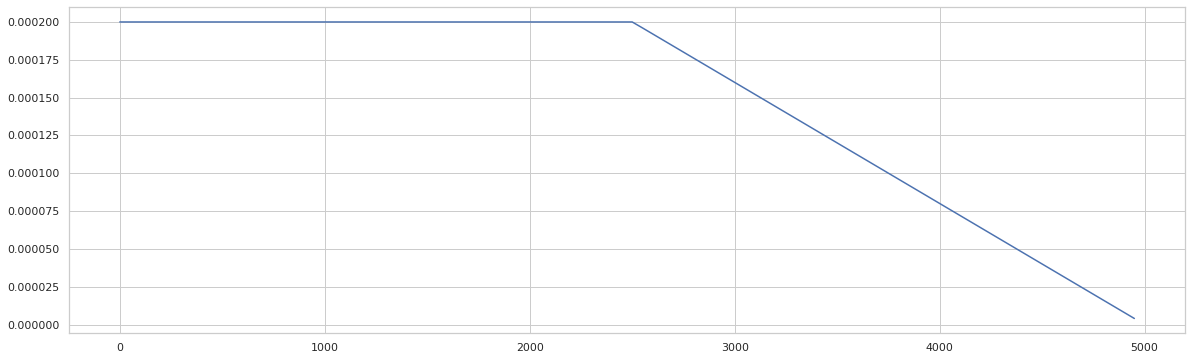

In [ ]:
@tf.function
def linear_schedule_with_warmup(step):
    """ Create a schedule with a learning rate that decreases linearly after
    linearly increasing during a warmup period.
    """
    lr_start   = 2e-4
    lr_max     = 2e-4
    lr_min     = 0.
    
    steps_per_epoch = int(max(n_vintage_samples, n_photo_samples)//BATCH_SIZE)
    total_steps = EPOCHS * steps_per_epoch
    warmup_steps = 1
    hold_max_steps = total_steps * 0.5 ## 100 epochs at consistent rate, then decreases to 0
    
    if step < warmup_steps:
        lr = (lr_max - lr_start) / warmup_steps * step + lr_start
    elif step < warmup_steps + hold_max_steps:
        lr = lr_max
    else:
        lr = lr_max * ((total_steps - step) / (total_steps - warmup_steps - hold_max_steps))
        if lr_min is not None:
            lr = tf.math.maximum(lr_min, lr)

    return lr

steps_per_epoch = int(max(n_vintage_samples, n_photo_samples)//BATCH_SIZE)
total_steps = EPOCHS * steps_per_epoch
rng = [i for i in range(0, total_steps, 50)]
y = [linear_schedule_with_warmup(x) for x in rng]

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(rng, y)
print(f'{EPOCHS} total epochs and {steps_per_epoch} steps per epoch')
print(f'Learning rate schedule: {y[0]:.3g} to {max(y):.3g} to {y[-1]:.3g}')

**Train**

In [ ]:
with strategy.scope():
    # Create generators
    lr_vintage_gen = lambda: linear_schedule_with_warmup(tf.cast(vintage_generator_optimizer.iterations, tf.float32))
    lr_photo_gen = lambda: linear_schedule_with_warmup(tf.cast(photo_generator_optimizer.iterations, tf.float32))
    
    # TODO: Change Adam to AdamW optimizer
    vintage_generator_optimizer = optimizers.Adam(learning_rate=lr_vintage_gen, beta_1=0.5)
    photo_generator_optimizer = optimizers.Adam(learning_rate=lr_photo_gen, beta_1=0.5)

    # Create discriminators
    lr_vintage_disc = lambda: linear_schedule_with_warmup(tf.cast(vintage_discriminator_optimizer.iterations, tf.float32))
    lr_photo_disc = lambda: linear_schedule_with_warmup(tf.cast(photo_discriminator_optimizer.iterations, tf.float32))
    
    # TODO: Change Adam to AdamW optimizer
    vintage_discriminator_optimizer = optimizers.Adam(learning_rate=lr_vintage_disc, beta_1=0.5)
    photo_discriminator_optimizer = optimizers.Adam(learning_rate=lr_photo_disc, beta_1=0.5)

    
    # Create GAN
    gan_model = CycleGan(vintage_generator, photo_generator, 
                         vintage_discriminator, photo_discriminator)

    gan_model.compile(v_gen_optimizer=vintage_generator_optimizer,
                      p_gen_optimizer=photo_generator_optimizer,
                      v_disc_optimizer=vintage_discriminator_optimizer,
                      p_disc_optimizer=photo_discriminator_optimizer,
                      gen_loss_fn=generator_loss,
                      disc_loss_fn=discriminator_loss,
                      cycle_loss_fn=calc_cycle_loss,
                      identity_loss_fn=identity_loss)

In [ ]:
# Create dataset
vintage_ds = get_dataset(VINTAGE_FILENAMES, batch_size=BATCH_SIZE)
photo_ds = get_dataset(PHOTO_FILENAMES, batch_size=BATCH_SIZE)
gan_ds = tf.data.Dataset.zip((vintage_ds, photo_ds))

photo_ds_eval = get_dataset(PHOTO_FILENAMES, repeat=False, shuffle=False, batch_size=1)
vintage_ds_eval = get_dataset(VINTAGE_FILENAMES, repeat=False, shuffle=False, batch_size=1)

# Callbacks
class GANMonitor(Callback):
    """A callback to generate and save images after each epoch"""

    def __init__(self, num_img=5, vintage_path='/content/drive/MyDrive/DeepLearningTPs/collab/vintage_out_SSIM_batch_55', photo_path='/content/drive/MyDrive/DeepLearningTPs/collab/photo_out_SSIM_batch_55'):
        self.num_img = num_img
        self.vintage_path = vintage_path
        self.photo_path = photo_path
        # Create directories to save the generate images
        if not os.path.exists(self.vintage_path):
            os.makedirs(self.vintage_path)
        if not os.path.exists(self.photo_path):
            os.makedirs(self.photo_path)

    def on_epoch_end(self, epoch, logs=None):
        # vintage generated images
        for i, img in enumerate(photo_ds_eval.take(self.num_img)):
            prediction = vintage_generator(img, training=False)[0].numpy()
            prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
            prediction = PIL.Image.fromarray(prediction)
            prediction.save(f'{self.vintage_path}/generated_{i}_{epoch+1}.png')
            
        # Photo generated images
        for i, img in enumerate(vintage_ds_eval.take(self.num_img)):
            prediction = photo_generator(img, training=False)[0].numpy()
            prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
            prediction = PIL.Image.fromarray(prediction)
            prediction.save(f'{self.photo_path}/generated_{i}_{epoch+1}.png')

In [ ]:
!pip install -q pyyaml h5py  # Required to save models in HDF5 format

In [ ]:
filepath = '/content/drive/MyDrive/DeepLearningTPs/collab/model_progress'
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath= filepath)

In [ ]:
gan_model.fit(gan_ds, epochs=EPOCHS,
              callbacks=[GANMonitor()],
              steps_per_epoch=(max(n_vintage_samples, n_photo_samples)//BATCH_SIZE))

Epoch 1/200


ResourceExhaustedError: ignored

In [ ]:
create_gif('/content/drive/MyDrive/DeepLearningTPs/collab/vintage_out_reg_batch_60/*.png', '/content/drive/MyDrive/DeepLearningTPs/collab/vintage_gif_reg_batch_60.gif') # Create vintage gif

In [ ]:
create_gif('/content/drive/MyDrive/DeepLearningTPs/collab/photo_out_reg_batch_60/*.png', '/content/drive/MyDrive/DeepLearningTPs/collab/photo_gif_reg_batch_60.gif') # Create vintage gif

In [ ]:
import sys
import imageio

sys.path.append('/content/drive/MyDrive/DeepLearningTPs/collab/facenetmaster/src')

from compare import compare_imgs

model = "/content/drive/MyDrive/DeepLearningTPs/collab/20180402-114759" 
face_1 = imageio.imread("/content/drive/MyDrive/DeepLearningTPs/dataset/test_face_recog_1.jpg") 
face_2 = imageio.imread("/content/drive/MyDrive/DeepLearningTPs/dataset/test_face_recog_2.jpg") 

print(compare_imgs(model, face_1, face_2)[1])

# loss1 = tf.math.squared_difference(new_model.predict(real_image), new_model.predict(cycled_image))

/usr/lib/python3.7/argparse.py:1829: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if arg_string == '--':


ValueError: ignored

In [ ]:
import sys
import PIL

sys.path.append('/content/drive/MyDrive/DeepLearningTPs/collab/facenetmaster/src')

from compare import compare_imgs

with strategy.scope():
    def calc_cycle_loss(real_image, cycled_image, LAMBDA):
        # loss1 = tf.reduce_mean(tf.abs(real_image - cycled_image))
        loss1 = tf.reduce_mean(tf.image.ssim(real_image, cycled_image, 256))
        # model = "/content/drive/MyDrive/DeepLearningTPs/collab/20180402-114759"
        # real_image_path = '/content/drive/MyDrive/DeepLearningTPs/collab/img_1.jpg'
        # cycled_image_path = '/content/drive/MyDrive/DeepLearningTPs/collab/img_2.jpg'

        # loss1 = tf.reduce_mean(compare_imgs(model, real_image_path, cycled_image_path)[1])

        return LAMBDA * loss1

In [ ]:
!pip install -q pyyaml h5py  # Required to save models in HDF5 format

In [ ]:
import os

filepath = '/content/drive/MyDrive/DeepLearningTPs/collab'
metric = 'val_photo_disc_loss'
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath= filepath, monitor=metric)
vintage_ds = get_dataset(VINTAGE_PHOTOS_FILENAMES, batch_size=16)
photo_ds = get_dataset(REAL_PHOTOS_FILENAMES, batch_size=16)
gan_ds = tf.data.Dataset.zip((vintage_ds, photo_ds))
# cycle_gan_model.fit(
#     ),
#     epochs=10,
#     callbacks= [checkpoint_callback]
# )

cycle_gan_model.fit(gan_ds, epochs=100, 
                        steps_per_epoch=(max(len(VINTAGE_PHOTOS_FILENAMES), len(REAL_PHOTOS_FILENAMES))//16))

Epoch 1/100


DataLossError: ignored

In [ ]:
cycle_gan_model.summary()
_, ax = plt.subplots(5, 2, figsize=(12, 12))
for i, img in enumerate(real_photo_ds.take(5)):
    prediction = vintage_generator(img, training=False)[0].numpy()
    prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
    img = (img[0] * 127.5 + 127.5).numpy().astype(np.uint8)

    ax[i, 0].imshow(img)
    ax[i, 1].imshow(prediction)
    ax[i, 0].set_title("Input Photo")
    ax[i, 1].set_title("Vintage-esque")
    ax[i, 0].axis("off")
    ax[i, 1].axis("off")
plt.show()

ValueError: ignored

In [ ]:
this_thing = False
if this_thing:
  #no need to run twice if the files have already been created
  from PIL import Image
  import os, sys

  #path = "/content/drive/MyDrive/DeepLearningTPs/dataset/training_real/"
  path = "/content/drive/MyDrive/DeepLearningTPs/dataset/vintage_portrait/"
  #save_path = "/content/drive/MyDrive/DeepLearningTPs/dataset/training_real_resized/"
  save_path = "/content/drive/MyDrive/DeepLearningTPs/dataset/vintage_portrait_resized/"
  dirs = os.listdir( path )

  def resize():
      for item in dirs:
          if os.path.isfile(path+item):
            try: 
              im = Image.open(path+item)
              f, e = os.path.splitext(save_path+item)
              imResize = im.resize((256,256), Image.ANTIALIAS)
              imResize.save(f + 'resized.jpg', 'JPEG', quality=90)
            except:
              print('error', path+item)
  resize()